<a href="https://colab.research.google.com/github/blackseashark5/Adobe-Gensolve/blob/main/Copy_of_occlusion1_sol_csvipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy svgwrite cairosvg ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 572.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd

# Load the data
occlusion1_sol_path = "occlusion1_sol.csv"
data = pd.read_csv(occlusion1_sol_path)

# Display the first few rows of the dataframe
data.head()


,0.000000000000000000e+00,0.000000000000000000e+00.1,1.456239929199218750e+02,1.208700027465820312e+02
0,0.0,0.0,145.756271,121.340767
1,0.0,0.0,145.863663,121.815895
2,0.0,0.0,145.946365,122.295265
3,0.0,0.0,146.004562,122.778740
4,0.0,0.0,146.038452,123.266197


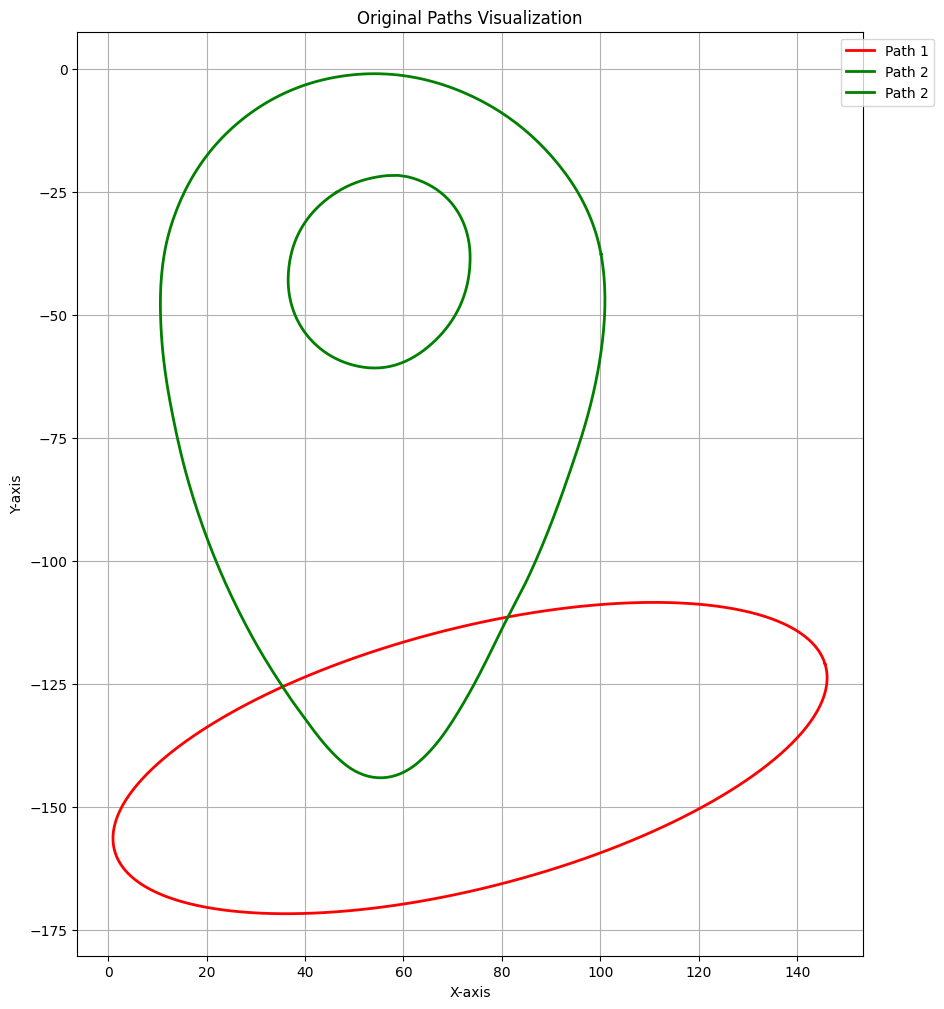

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_paths(paths_XYs, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2, label=f'Path {i+1}' if XY.shape[0] > 1 else '')  # Invert Y-axis for correct orientation

    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Path to your CSV file
csv_path = 'occlusion1_sol.csv'  # Replace with your CSV file path

# Read and plot paths
paths_XYs = read_csv(csv_path)
plot_paths(paths_XYs, 'Original Paths Visualization')


In [ ]:
import numpy as np
import svgwrite
import cairosvg
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def polylines2svg(paths_XYs, svg_path, colours):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            if XY.shape[1] < 2:
                continue
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            if XY.shape[1] < 2:
                continue
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')

    return png_path

def plot_svg(png_path):
    img = plt.imread(png_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


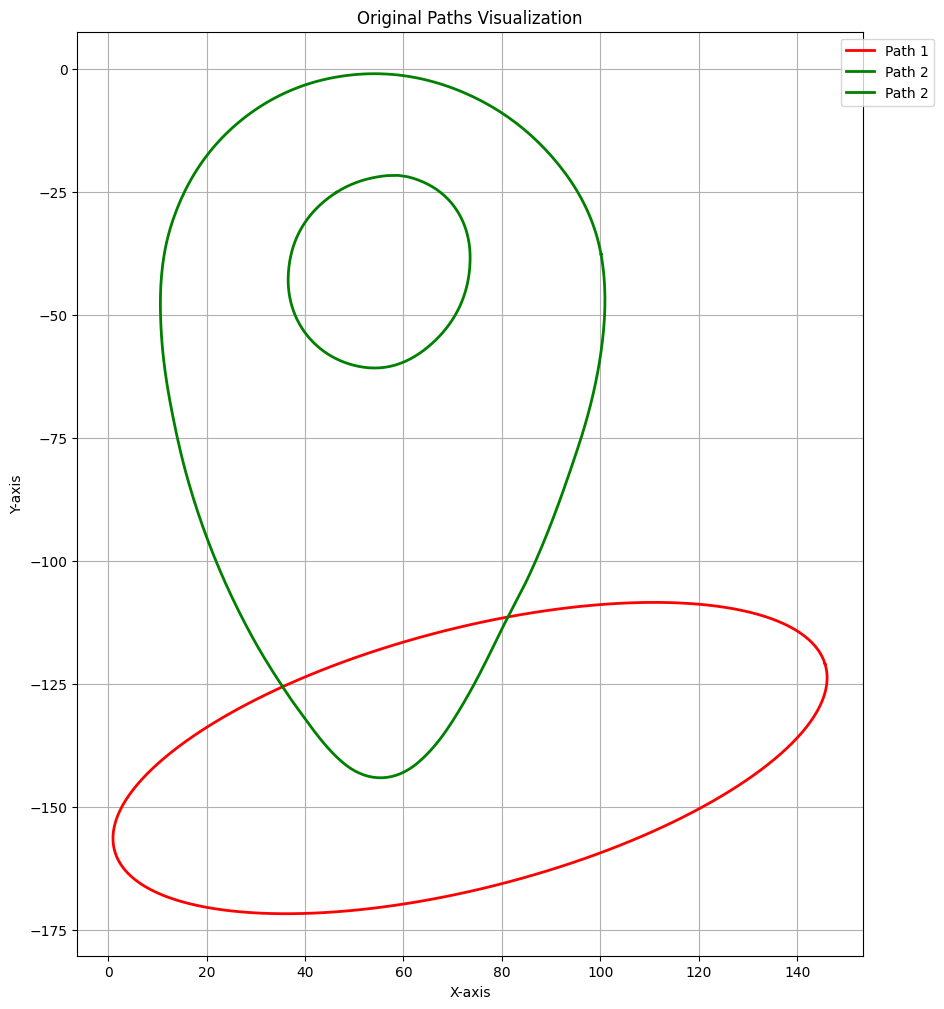

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_paths(paths_XYs, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2, label=f'Path {i+1}' if XY.shape[0] > 1 else '')  # Invert Y-axis for correct orientation

    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Path to your CSV file
csv_path = 'occlusion1_sol.csv'  # Replace with your CSV file path

# Read and plot paths
paths_XYs = read_csv(csv_path)
plot_paths(paths_XYs, 'Original Paths Visualization')


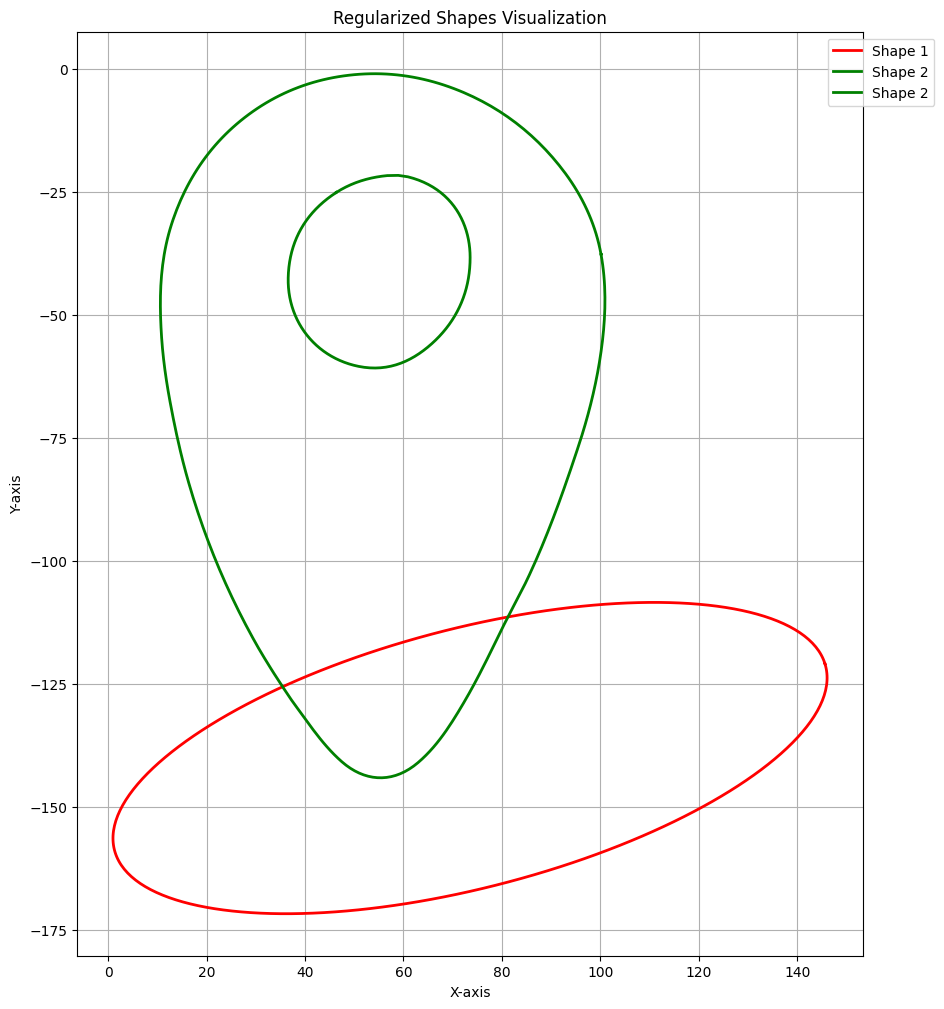

In [ ]:
def regularize_curves(paths_XYs):
    # Placeholder for regularization logic
    # Return regularized shapes
    return paths_XYs  # Replace this with actual regularization implementation

def plot_shapes(shapes, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(shapes):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2, label=f'Shape {i+1}' if XY.shape[0] > 1 else '')  # Invert Y-axis for correct orientation

    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Regularize and plot shapes
regular_shapes = regularize_curves(paths_XYs)
plot_shapes(regular_shapes, 'Regularized Shapes Visualization')


In [ ]:
def detect_symmetry(paths_XYs):
    # Placeholder for symmetry detection logic
    # Return symmetric shapes
    return paths_XYs  # Replace this with actual symmetry detection implementation

# Detect symmetry
symmetric_shapes = detect_symmetry(paths_XYs)
print(f"Symmetric shapes detected: {len(symmetric_shapes)}")


Symmetric shapes detected: 2


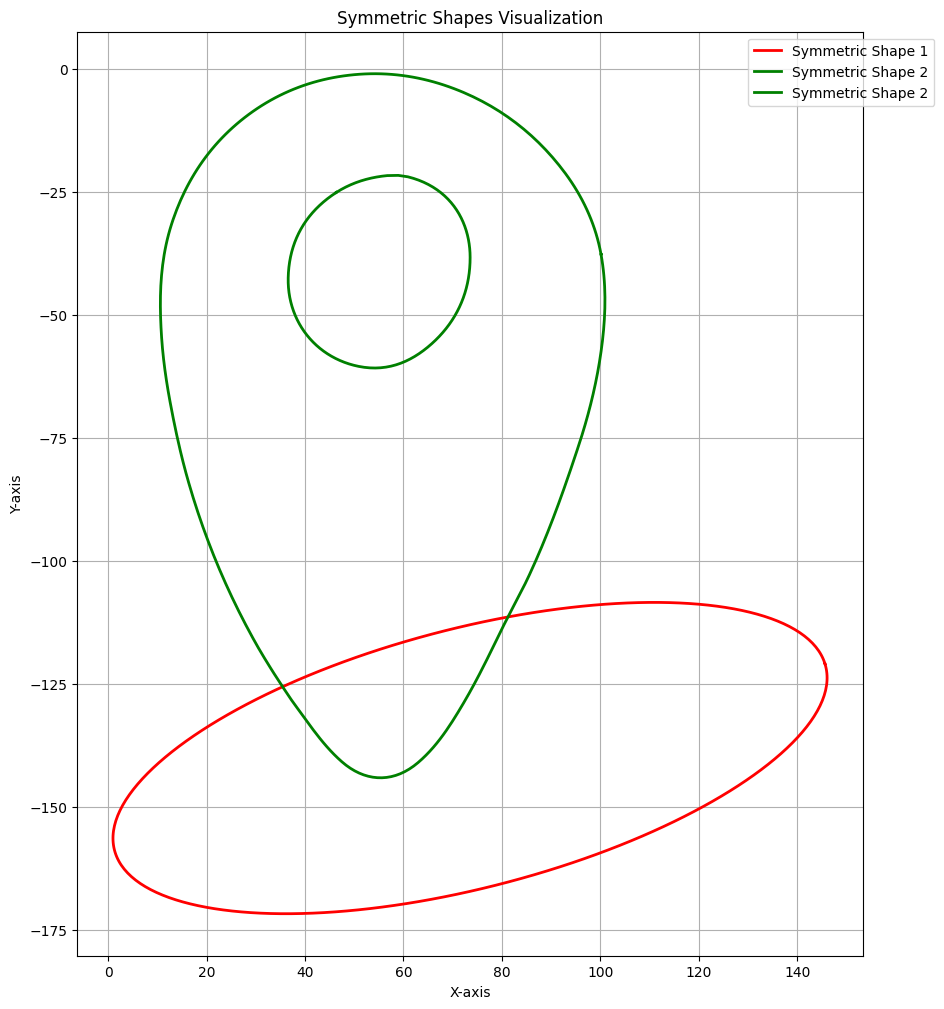

In [ ]:
# Plot symmetric shapes
def plot_symmetric_shapes(symmetric_shapes, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(symmetric_shapes):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2, label=f'Symmetric Shape {i+1}' if XY.shape[0] > 1 else '')  # Invert Y-axis for correct orientation

    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

plot_symmetric_shapes(symmetric_shapes, 'Symmetric Shapes Visualization')


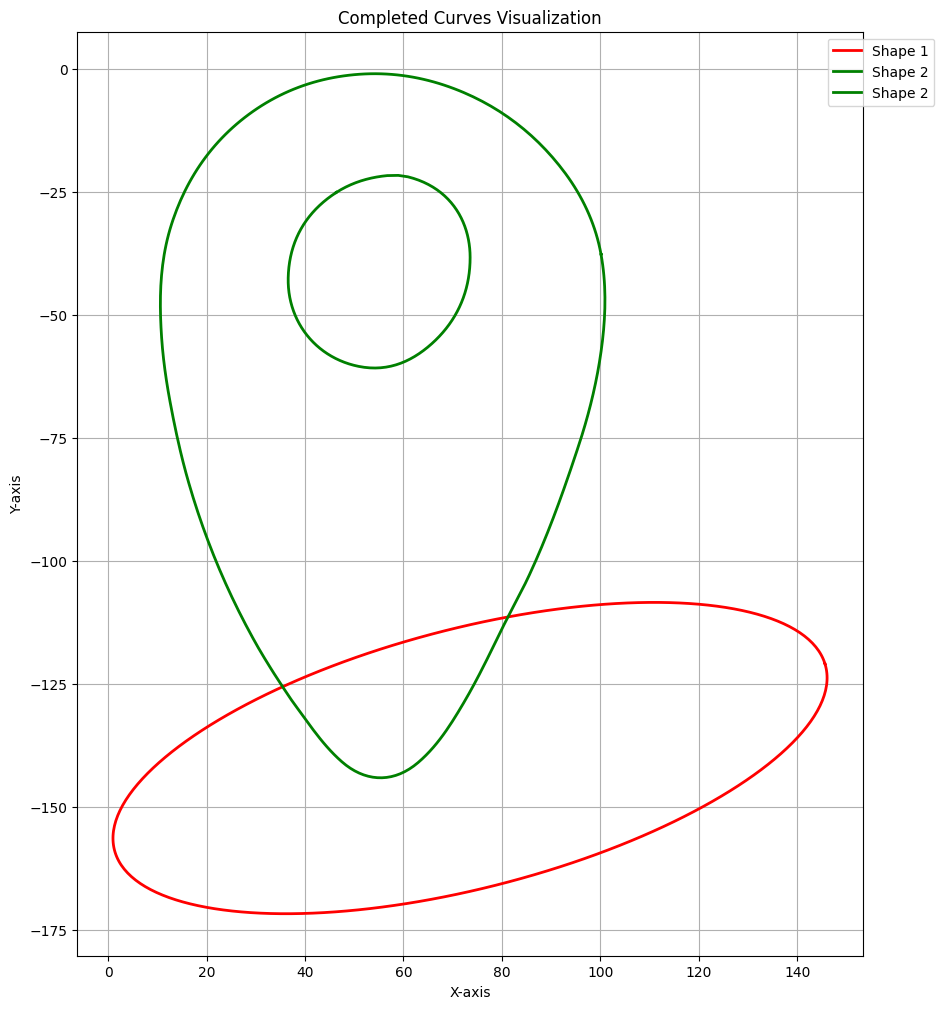

In [ ]:
def complete_curves(paths_XYs):
    # Placeholder for curve completion logic
    # Return completed curves
    return paths_XYs  # Replace this with actual curve completion implementation

# Complete curves and plot
completed_shapes = complete_curves(paths_XYs)
plot_shapes(completed_shapes, 'Completed Curves Visualization')


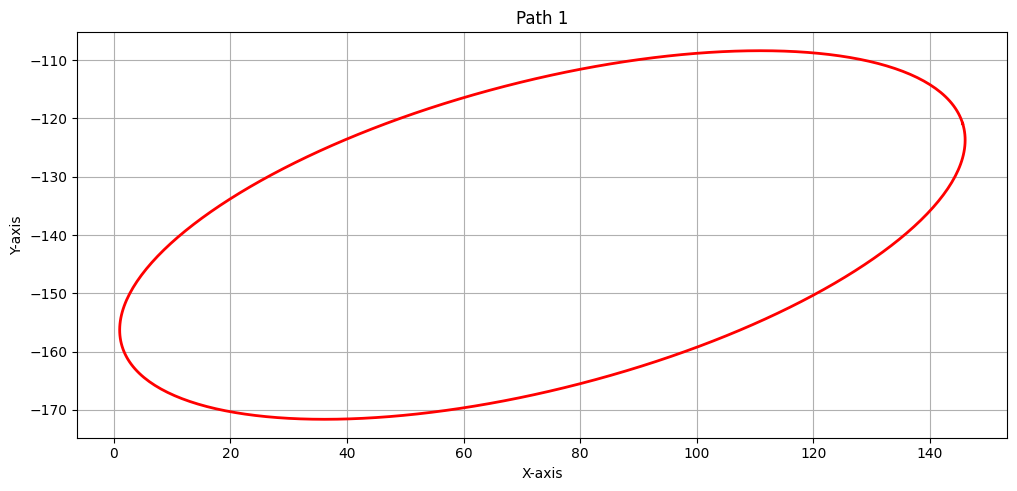

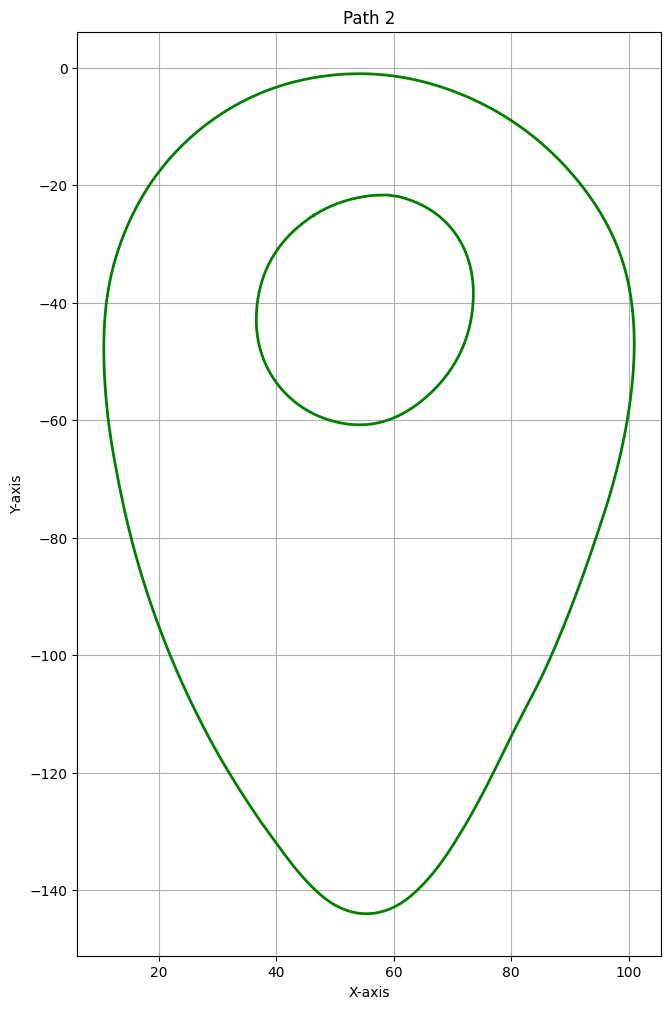

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot_individual_paths(paths_XYs):
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(paths_XYs):
        fig, ax = plt.subplots(figsize=(12, 12))
        c = colours[i % len(colours)]

        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert Y-axis for correct orientation

        ax.set_aspect('equal')
        ax.set_title(f'Path {i+1}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.grid(True)
        plt.show()

# Path to your CSV file
csv_path = 'occlusion1_sol.csv'  # Replace with your CSV file path

# Read and plot individual paths
paths_XYs = read_csv(csv_path)
plot_individual_paths(paths_XYs)
